In [1]:
# 📚 Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# 📥 Load the dataset
df = pd.read_csv("../datasets/housing-data.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41,6.9841,1.0238,322,2.5556,37.88,-122.23,4.526
1,8.3014,21,6.2381,0.9719,2401,2.1098,37.86,-122.22,3.585
2,7.2574,52,8.2881,1.0734,496,2.8023,37.85,-122.24,3.521
3,5.6431,52,5.8174,1.0731,558,2.5479,37.85,-122.25,3.413
4,3.8462,52,6.2819,1.0811,565,2.1815,37.85,-122.25,3.422


In [3]:
# 🎯 Separating independent variables (features) and target variable
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

In [4]:
# 🧾 Checking the shape of feature and target sets
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (50, 8)
Shape of y: (50,)


In [5]:
# 🔀 Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [6]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40, 8)
Shape of X_test: (10, 8)
Shape of y_train: (40,)
Shape of y_test: (10,)


In [7]:
# 🏗️ Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# 📌 Intercept of the regression line
print(f"Intercept (β₀): {model.intercept_:.2f}")

Intercept (β₀): 1355.19


In [9]:
# 📊 Coefficients for each feature (β₁ to βn)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

      Feature  Coefficient
0      MedInc     0.142302
1    HouseAge     0.007007
2    AveRooms     0.381682
3   AveBedrms     1.510357
4  Population    -0.000108
5    AveOccup    -0.996865
6    Latitude    -6.838740
7   Longitude     8.963743


In [10]:
# 🔮 Making predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# 📏 Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


📉 Mean Squared Error (MSE): 0.09
📉 Root Mean Squared Error (RMSE): 0.30
📈 R² Score: 0.86


In [12]:
# 🆚 Comparing Actual vs Predicted values
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(comparison.head())

    Actual  Predicted
36   1.823   1.767638
47   1.823   1.763900
28   1.829   1.732709
9    2.611   2.466687
13   2.339   2.335071


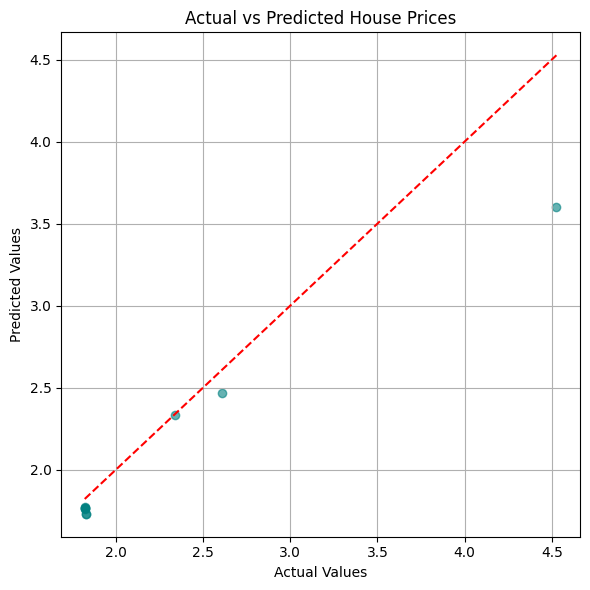

In [13]:
# 📈 Optional: Plotting Actual vs Predicted for visualization
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()